In [12]:
import cv2
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

In [2]:
data_path = "data\\chest_xray"
train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")
val_path = os.path.join(data_path, "val")


## EDA (Exploratory Data Analysis)

In [3]:
for dataset_type in ["train", "test", "val"]:
    for category in ["NORMAL", "PNEUMONIA"]:
        path = os.path.join(data_path, dataset_type, category)
        print(f"{dataset_type} - {category}: {len(os.listdir(path))} images")

train - NORMAL: 1341 images
train - PNEUMONIA: 3875 images
test - NORMAL: 234 images
test - PNEUMONIA: 390 images
val - NORMAL: 8 images
val - PNEUMONIA: 8 images


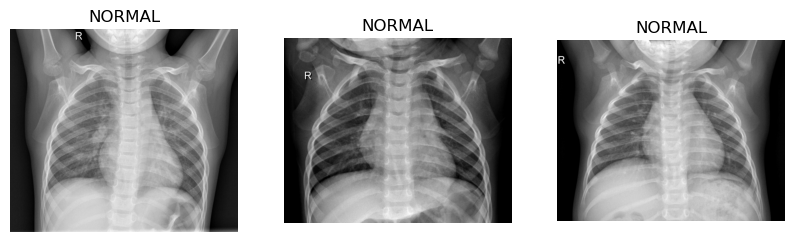

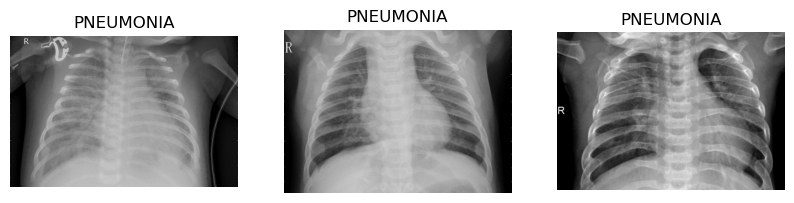

In [28]:
def plot_images(category, dataset_type, num_images=3):
    path = os.path.join(data_path, dataset_type, category)
    images = os.listdir(path)[:num_images]
    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(images):
        img = Image.open(os.path.join(path, img_name))
        plt.subplot(1, num_images, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{category}")
        plt.axis('off')
    plt.show()

plot_images("NORMAL", "train")
plot_images("PNEUMONIA", "train")

**High-intensity abnormal areas**: In the MRI of a patient with pneumonia, there are areas that appear brighter (due to inflammation or fluid) compared to the image of a normal patient, where the lungs appear dark.

**Consolidations and opacities**: Pulmonary consolidation areas, which are regions where the alveoli are filled with fluid and inflammatory cells, are not present in a healthy patient.

**Changes in lung structure**: The appearance of pulmonary edema and thickening of the bronchi and pleura is a typical indicator of infection in MRI images 
of a patient with pneumonia.

**Pleural effusion**: If the infection is severe, a pleural effusion (accumulation of fluid between the two layers of the pleura) may be observed, which is not normal.

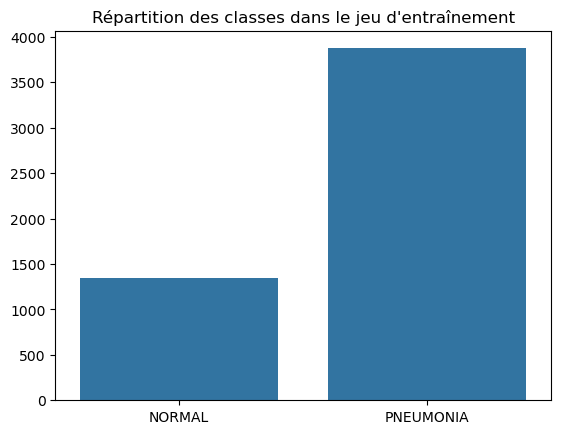

In [13]:
train_counts = {'NORMAL': len(os.listdir(os.path.join(train_path, 'NORMAL'))),
                'PNEUMONIA': len(os.listdir(os.path.join(train_path, 'PNEUMONIA')))}

sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Répartition des classes dans le jeu d'entraînement")
plt.show()


We can observe that the class distribution is not balanced, which could potentially impact the performance of the machine learning model. Therefore, we will proceed to resample the dataset to address this imbalance in the next sections of this notebook.

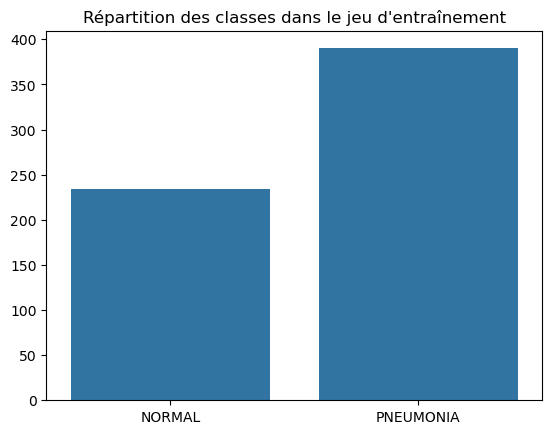

In [18]:
train_counts = {'NORMAL': len(os.listdir(os.path.join(test_path, 'NORMAL'))),
                'PNEUMONIA': len(os.listdir(os.path.join(test_path, 'PNEUMONIA')))}

sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Répartition des classes dans le jeu d'entraînement")
plt.show()


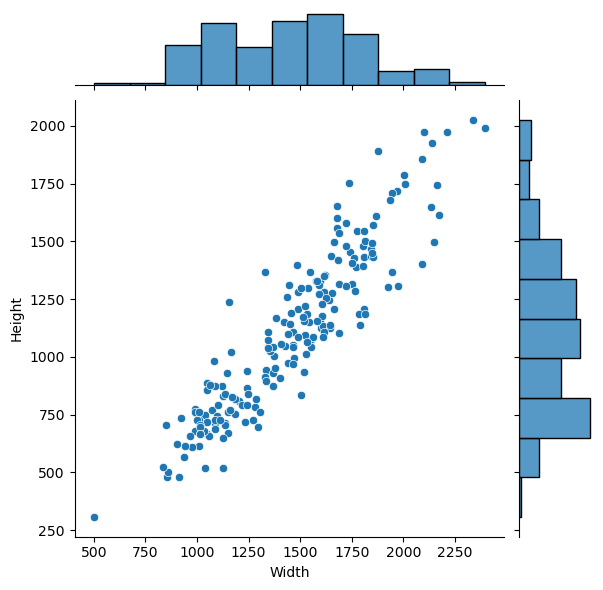

In [24]:
image_shapes = []

for category in ["NORMAL", "PNEUMONIA"]:
    path = os.path.join(train_path, category)
    for img_name in os.listdir(path)[:100]:  
        img = Image.open(os.path.join(path, img_name))
        image_shapes.append(img.size)

df_shapes = pd.DataFrame(image_shapes, columns=["Width", "Height"])
sns.jointplot(x="Width", y="Height", data=df_shapes, kind="scatter")
plt.show()

The graph above reveals variations in the dimensions of the images within the dataset. Standardizing the image dimensions is essential before proceeding with the training phase.

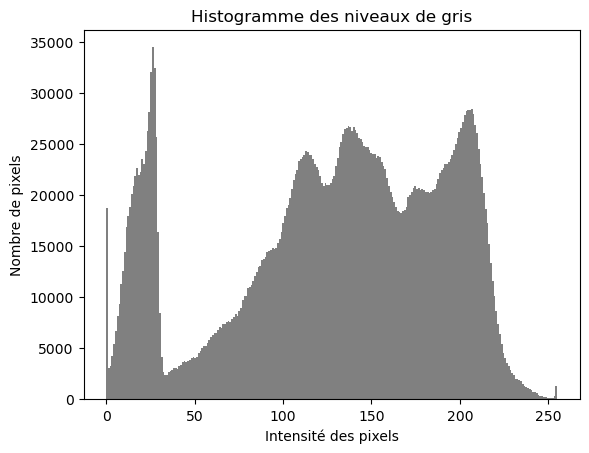

In [27]:
def plot_histogram(img_path):
    img = Image.open(img_path).convert("L")
    img_array = np.array(img)
    plt.hist(img_array.ravel(), bins=256, color='gray')
    plt.title("Histogramme des niveaux de gris")
    plt.xlabel("Intensité des pixels")
    plt.ylabel("Nombre de pixels")
    plt.show()

plot_histogram(os.path.join(train_path, "NORMAL", os.listdir(os.path.join(train_path, "NORMAL"))[0]))

The histogram represents the distribution of grayscale levels in an image. The horizontal axis represents pixel intensity (0 = black, 255 = white).The vertical axis indicates the number of pixels for each intensity level.
It is importnat to note that a significant peak in the darker tones (low pixels intensity) may indicate low contrast or a lighting issue in the image.

## Data Preparation

## Modelisation 